In [16]:
# %pip install -U qiskit
from qiskit import __version__
print('Qiskit Sürümü: ', __version__)

Qiskit Sürümü:  1.0.2


## <b>Deutsch-Jozsa Algoritması</b>

In [17]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import quantum_info
from qiskit.visualization import plot_bloch_multivector

String bitleri alan ve "0" veya "1" geri dönen bir boolean karakutu fonksiyonu olsun:

$ f(\{x_0,x_1,x_2,...\}) \rightarrow 0 \textrm{ veya } 1, x_n \textrm{ is } 0 \textrm{ veya } 1$

Verilen Boolean fonksiyonunun özelliği, ya dengeli ya da sabit olduğunun garanti edilmesidir. Sabit bir işlev, herhangi bir giriş için tüm 0'ları veya tüm 0'ları döndürürken, dengeli bir işlev, tüm girişlerin tam yarısı için 0'lerı ve diğer yarısı için 1'ları döndürür. Görevimiz verilen fonksiyonun dengeli mi yoksa sabit mi olduğunu belirlemektir.

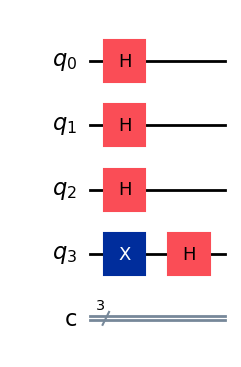

In [18]:
qubit_count=3
dj_circuit = QuantumCircuit(qubit_count+1, qubit_count)

for qubit in range(qubit_count):
    dj_circuit.h(qubit)

dj_circuit.x(qubit_count)
dj_circuit.h(qubit_count)
dj_circuit.draw(output='mpl')

In [19]:
def dj_oracle(case, n):
    # Bu devre n+1 kubite sahip: girdi kubit boyutu,
    # ve bir de cikti kubit
    oracle_qc = QuantumCircuit(n+1)
    
    # Dengeli oracle isteniyor ise:
    if case == "balanced":
        b = np.random.randint(1,2**n)
        # Ikili stringi formatlayalim.
        b_str = format(b, '0'+str(n)+'b')
        
        # Sonra, ilk X kapilarini koyalim. Ikili stringteki her rakam bir
        # kubite denk geldigi için, string 1 ise X kapisi gerekir.
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        
        # Cikti qubiti hedef olacak sekilde,
        # tum kubitler ile CNOT
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
            
        # Sonra, son X kapilarini koyalim.
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Sabit oracle isteniyor ise:
    if case == "constant":
        # Ilk olarak hangi sabit cikti isteniyor rastgele secelim.
        output = np.random.randint(2)
        
        # Rasgele 1 gelirse, son kubite X uygulayalim.
        if output == 1:
            oracle_qc.x(n)
    
    # Devreyi kapi yapar.
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle"
    return oracle_gate

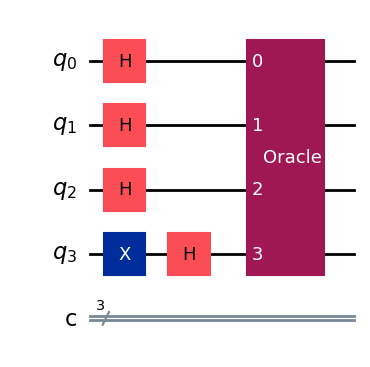

In [20]:
dj_circuit.append(dj_oracle("balanced", qubit_count), range(qubit_count+1))
dj_circuit.draw(output='mpl')

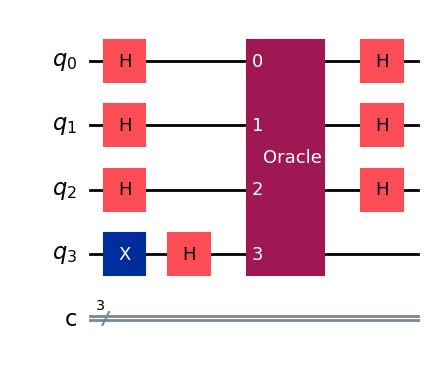

In [21]:
for qubit in range(qubit_count):
    dj_circuit.h(qubit)
dj_circuit.draw(output='mpl')

In [22]:
sav = quantum_info.Statevector(dj_circuit)
sav.draw(output='latex')

<IPython.core.display.Latex object>

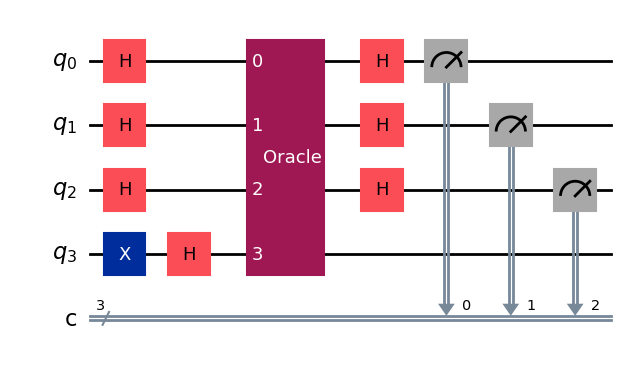

In [23]:
for i in range(qubit_count):
    dj_circuit.measure(i, i)
dj_circuit.draw(output='mpl')

### DJ devresinin simüle edilmesi

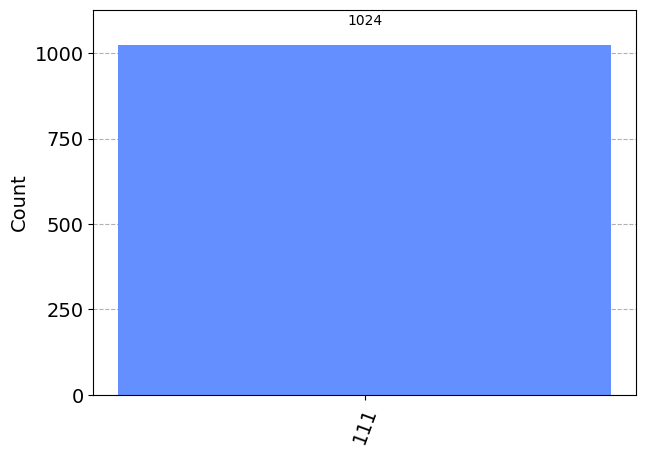

In [25]:
simulator = AerSimulator()
dj_circuit = transpile(dj_circuit, simulator)
result = simulator.run(dj_circuit).result().get_counts(0)
plot_histogram(result)